# Esercitazione 0

Argomenti: manipolazione di vettori e matrici, grafici di funzioni, linguaggio Matlab


In [60]:
import numpy as np
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

## Esercizio 3

1. Definire la matrice $A=\left\lbrack \begin{array}{cccccc}
1 & 2 & 3 & 4 & 5 & 6\\
5 & 6 & 7 & 8 & 9 & 10\\
9 & 10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19 & 20
\end{array}\right\rbrack$
2. Costruire la matrice $B$ formata dalle colonne di $A$ disposte in ordine inverso (ossia, la prima colonna di $B$ è la sesta di $A$, la seconda di $B$ è la quinta di $A$...)
3. Costruire la matrice formata dalle sole colonne pari di $A$
4. Costruire la matrice formata dalle sole righe dispari di $A$
5. Costruire la matrice formata dalle righe 1, 4, 3 e dalle colonne 5, 2 di $A$
6. Costruire il vettore formato dagli elementi diagonali $a_{k,k}$ con $k \in \{1, \dots , 4\}$ di $A$


#### Parte 1

Definire la matrice

$A = \left\lbrack \begin{array}{cccccc}
1 & 2 & 3 & 4 & 5 & 6\\
5 & 6 & 7 & 8 & 9 & 10\\
9 & 10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19 & 20
\end{array}\right\rbrack$

##### Risoluzione

In [61]:
A = np.array([np.arange(1, 7),
              np.arange(5, 11),
              np.arange(9, 15),
              np.arange(15, 21)])
print(A)

[[ 1  2  3  4  5  6]
 [ 5  6  7  8  9 10]
 [ 9 10 11 12 13 14]
 [15 16 17 18 19 20]]


#### Parte 2

Costruire la matrice $B$ formata dalle colonne di $A$ disposte in ordine inverso (ossia, la prima colonna di $B$ è la sesta di $A$, la seconda di $B$ è la quinta di $A$...)

##### Risoluzione

In [62]:
B = A[:,:0:-1]
print(B)

[[ 6  5  4  3  2]
 [10  9  8  7  6]
 [14 13 12 11 10]
 [20 19 18 17 16]]


### Parte 3

Costruire la matrice formata dalle sole colonne pari di $A$

#### Risoluzione

In [63]:
APari = A[:,1::2]
print(APari)

[[ 2  4  6]
 [ 6  8 10]
 [10 12 14]
 [16 18 20]]


### Parte 4

Costruire la matrice formata dalle sole righe dispari di $A$

#### Risoluzione

In [64]:
ADispari = A[0::2,:]
print(ADispari)

[[ 1  2  3  4  5  6]
 [ 9 10 11 12 13 14]]


### Parte 5

Costruire la matrice formata dalle righe 1, 4, 3 e dalle colonne 5, 2 di $A$

#### Risoluzione

In [65]:
ARidotta = A[np.ix_([0,3,2],[4,1])]
print(ARidotta)

[[ 5  2]
 [19 16]
 [13 10]]


### Parte 6

Costruire il vettore formato dagli elementi diagonali $a_{k,k}$ con $k \in \{1, \dots, 4\}$ di $A$

#### Risoluzione

In [66]:
diagA = np.diag(A)
print(diagA)

[ 1  6 11 18]


## Esercizio 4

1. Utilizzare il comando diag di Python per definire la matrice tridiagonale $B$ di dimensione $10\times 10$, i cui elementi della diagonale principale sono tutti uguali a 5 e quelli delle codiagonali inferiore e superiore sono rispettivamente uguali a −1 e a 3
2. Quindi porre uguale a 2 gli elementi appartenenti all’intersezione delle colonne 6 e 9 e delle righe 5 e 8.

### Parte 1

Utilizzare il comando diag di Python per definire la matrice tridiagonale $B$ di dimensione $10\times 10$, i cui elementi della diagonale principale sono tutti uguali a 5 

#### Risoluzione

In [67]:
B1 = np.diag(5.0*np.ones((10)),0)
B2 = np.diag(3.0*np.ones(9),1);
B3 = np.diag(-1.0*np.ones(9),-1);
B = B1 + B2 + B3
print(B)

[[ 5.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  5.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  5.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  5.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  5.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  5.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  5.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  5.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  5.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  5.]]


### Parte 2
Quindi porre uguale a 2 gli elementi appartenenti all’intersezione delle colonne 6 e 9 e delle righe 5 e 8.

#### Risoluzione

In [68]:
B[np.ix_([4,7],[5,8])] = 2.0
print(B)

[[ 5.  3.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  5.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  5.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  5.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  5.  2.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. -1.  5.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  5.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  2. -1.  5.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  5.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  5.]]


## Esercizio 5

1. Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=e^{-x^2 } \;\;\mathrm{con}-5\le x\le 5$$
2. Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=x\;\sin \left(\frac{1}{x}\right)\;\mathrm{con}\;\;0<x\le 2$$

### Parte 1

Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=e^{-x^2 } \;\;\mathrm{con}-5\le x\le 5$$

#### Risoluzione

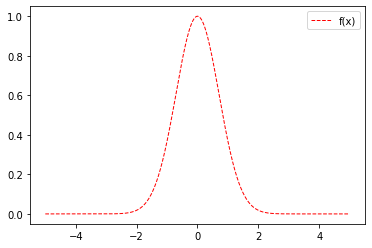

In [85]:
x = np.linspace(-5.0, 5.0, 1000)
f = lambda x: np.exp(-x**2)

plt.plot(x, f(x), label="f(x)", color='red', linewidth=1, linestyle='--')
plt.legend()
plt.show()


### Parte 2

Utilizzare il comando plot di Python per rappresentare graficamente le seguenti funzioni: $$f\left(x\right)=x\;\sin \left(\frac{1}{x}\right)\;\mathrm{con}\;\;0<x\le 2$$

#### Risoluzione

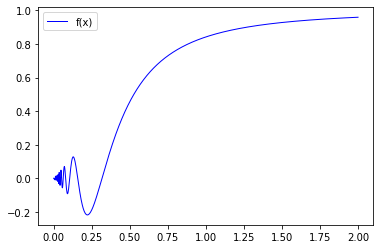

In [97]:
x = np.linspace(0.001, 2.0, 1000)
f = lambda x: x * np.sin(1 / x)

plt.plot(x, f(x), label="f(x)", color='blue', linewidth=1, linestyle='-')
plt.legend()